In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("data.csv")

In [5]:
data.head()

,Unnamed: 0,Day,Date,workoutActivityType,duration,durationUnit,activeEnergyBurned,basalEnergyBurned
0,0,Thursday,2021-10-28,Walking,13.567281,min,57.4218,19.4816
1,1,Saturday,2021-11-06,Walking,58.435548,min,179.7990,85.0515
2,2,Thursday,2021-11-11,Walking,19.535098,min,61.9580,27.9599
3,3,Saturday,2021-11-13,Walking,41.136365,min,137.4680,59.5096
4,4,Monday,2021-11-15,Walking,28.166449,min,72.9412,40.6188


In [6]:
data.shape

(207, 8)

In [7]:
# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode categorical variable
data['workoutActivityType_encoded'] = encoder.fit_transform(data['workoutActivityType'])
data['day_encoded'] = encoder.fit_transform(data['Day'])

In [8]:
# Select features for clustering
features = ['day_encoded', 'workoutActivityType_encoded', 'duration', 'activeEnergyBurned', 'basalEnergyBurned']

In [9]:
# Drop rows with missing values
data.dropna(subset=features, inplace=True)

In [10]:
# Normalize the features
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data[features])

In [11]:
# Initialize KMeans clustering algorithm
num_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

In [12]:
# Fit KMeans to the normalized data
kmeans.fit(data_normalized)

KMeans(n_clusters=3, random_state=42)

In [13]:
# Assign clusters to each data point
data['cluster'] = kmeans.labels_

In [14]:
# Print the cluster centers
print("Cluster centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

Cluster centers:
[[  3.23275862  14.40517241  27.95844111 121.84487879  39.72920086]
 [  2.6875       9.9375     118.53442613 536.8854375  172.2106875 ]
 [  3.18666667   5.4         35.92155794 180.62817333  52.2042916 ]]


In [15]:
# Display cluster assignments
print("\nCluster assignments:")
print(data[['Day', 'Date', 'cluster']])


Cluster assignments:
           Day        Date  cluster
0     Thursday  2021-10-28        0
1     Saturday  2021-11-06        0
2     Thursday  2021-11-11        0
3     Saturday  2021-11-13        0
4       Monday  2021-11-15        0
..         ...         ...      ...
202    Tuesday  2024-03-12        0
203  Wednesday  2024-03-13        0
204  Wednesday  2024-03-27        0
205   Thursday  2024-03-28        0
206     Friday  2024-04-05        0

[207 rows x 3 columns]


In [16]:
print("Unique Cluster Labels:", set(kmeans.labels_))

Unique Cluster Labels: {0, 1, 2}


In [18]:
# Monitor consecutive high-intensity workout days
high_intensity_cluster_label = 1
count_high_intensity = 0
threshold = 4  # Threshold for consecutive high-intensity workouts

# List to store alert messages
alert_messages = []

# Loop through each data point and check if it belongs to the high-intensity workout cluster
for intensity in data['cluster']:
    if intensity == high_intensity_cluster_label:
        count_high_intensity += 1
    else:
        count_high_intensity = 0

    # Trigger alert if count exceeds threshold
    if count_high_intensity > threshold:
        # Trigger alert
        alert_message = f"You have had {count_high_intensity} consecutive days of high-intensity workouts. Consider taking a rest day."
        alert_messages.append(alert_message)
    else:
        alert_messages.append(None)  # Append None if no alert is triggered

# Add the alert messages to the DataFrame
data['Alert Message'] = alert_messages

# Export the DataFrame to a CSV file
data.to_csv('output-injury.csv', index=False)


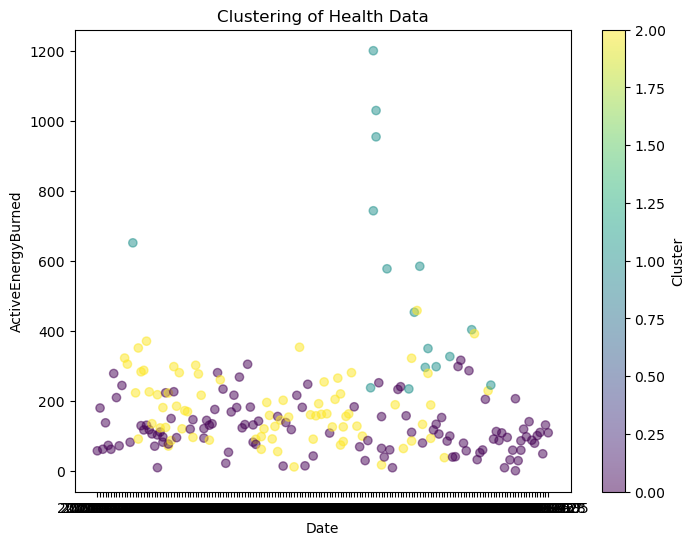

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Date'], data['activeEnergyBurned'], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title('Clustering of Health Data')
plt.xlabel('Date')
plt.ylabel('ActiveEnergyBurned')
plt.colorbar(label='Cluster')
plt.show()